<h1><center>Telecom Industry Churn Prediction Using Stats Models</center></h1>

# Step 1: Importing and Merging Data Frames

In [1]:
#import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows',10000)
pd.set_option('display.max_columns',100)

In [2]:
#upload datasets

churn_data=pd.read_csv('churn_data.csv')
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#load customer data
customer_data = pd.read_csv('customer_data.csv')
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [4]:
# load internet data
internet_data = pd.read_csv('internet_data.csv')
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


####  Combining all the files & create a master frame

In [5]:
df_1 = pd.merge(churn_data,customer_data,how='inner',on='customerID')
df_1.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No


In [6]:
customer = pd.merge(df_1,internet_data,how='inner',on='customerID')
customer.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


# Step 2: Inspecting a Data frame

In [7]:
customer.shape

(7043, 21)

In [8]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [9]:
customer.isnull().sum()

customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

# Step 3: Data Preparations

In [10]:
customer.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


In [11]:
print(customer['PhoneService'].unique())
print(customer['PaperlessBilling'].unique())
print(customer['Churn'].unique())
print(customer['Partner'].unique())
print(customer['Dependents'].unique())

['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']


In [12]:
def my_map(x):
    return x.map({'Yes':1,'No':0})

In [13]:
var_list = ['PhoneService','PaperlessBilling','Churn','Partner','Dependents',]
customer[var_list] = customer[var_list].apply(my_map)
customer.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,0,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0,No,Fiber optic,No,No,No,No,No,No


In [14]:
## Create Dummy variables
print(customer['Contract'].unique())
print(customer['PaymentMethod'].unique())
print(customer['gender'].unique())
print(customer['InternetService'].unique())

['Month-to-month' 'One year' 'Two year']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
['Female' 'Male']
['DSL' 'Fiber optic' 'No']


In [15]:
dummy_list = ['Contract','PaymentMethod','gender','InternetService']
dummy1 = pd.get_dummies(customer[dummy_list],drop_first=True)
customer=pd.concat([customer,dummy1],axis=1)

In [16]:
customer.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,0,0,0,1,0,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,0,0,0,No,DSL,Yes,No,Yes,No,No,No,1,0,0,0,1,1,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,No,DSL,Yes,Yes,No,No,No,No,0,0,0,0,1,1,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,1,0,0,0,0,1,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0,No,Fiber optic,No,No,No,No,No,No,0,0,0,1,0,0,1,0


In [17]:
#checking unique values
print(customer['MultipleLines'].unique())
print(customer['OnlineSecurity'].unique())
print(customer['OnlineBackup'].unique())
print(customer['DeviceProtection'].unique())
print(customer['TechSupport'].unique())
print(customer['StreamingTV'].unique())
print(customer['StreamingMovies'].unique())

['No phone service' 'No' 'Yes']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']


In [18]:
d1 = pd.get_dummies(customer['MultipleLines'],prefix='MultipleLines')
d11 = d1.drop(['MultipleLines_No phone service'],axis=1)

customer = pd.concat([customer,d11],axis=1)

d2 = pd.get_dummies(customer['OnlineSecurity'],prefix='OnlineSecurity')
d22 = d2.drop(['OnlineSecurity_No internet service'],axis=1)

customer = pd.concat([customer,d22],axis=1)

d3 = pd.get_dummies(customer['OnlineBackup'],prefix='OnlineBackup')
d33 = d3.drop(['OnlineBackup_No internet service'],axis=1)

customer = pd.concat([customer,d33],axis=1)

d4 = pd.get_dummies(customer['DeviceProtection'],prefix='DeviceProtection')
d44 = d4.drop(['DeviceProtection_No internet service'],axis=1)

customer = pd.concat([customer,d44],axis=1)

d5 = pd.get_dummies(customer['TechSupport'],prefix='TechSupport')
d55 = d5.drop(['TechSupport_No internet service'],axis=1)

customer = pd.concat([customer,d55],axis=1)

d6 = pd.get_dummies(customer['StreamingTV'],prefix='StreamingTV')
d66 = d6.drop(['StreamingTV_No internet service'],axis=1)

customer = pd.concat([customer,d66],axis=1)

d7 = pd.get_dummies(customer['StreamingMovies'],prefix='StreamingMovies')
d77 = d7.drop(['StreamingMovies_No internet service'],axis=1)

customer = pd.concat([customer,d77],axis=1)

In [19]:
customer.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,0,0,0,No,DSL,Yes,No,Yes,No,No,No,1,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,No,DSL,Yes,Yes,No,No,No,No,0,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0,No,Fiber optic,No,No,No,No,No,No,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [20]:
# Drop Variables

customer1=customer.drop(labels=['Contract','PaperlessBilling','PaymentMethod','gender','MultipleLines',
                     'InternetService','OnlineSecurity','OnlineBackup',
                      'DeviceProtection','StreamingTV','StreamingMovies'],axis=1)

In [21]:
customer1.head()

,customerID,tenure,PhoneService,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,TechSupport,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,29.85,29.85,0,0,1,0,No,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,56.95,1889.5,0,0,0,0,No,1,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,53.85,108.15,1,0,0,0,No,0,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,42.30,1840.75,0,0,0,0,Yes,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,70.70,151.65,1,0,0,0,No,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [22]:
customer1.shape

(7043, 32)

In [23]:
customer1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   MonthlyCharges                         7043 non-null   float64
 4   TotalCharges                           7043 non-null   object 
 5   Churn                                  7043 non-null   int64  
 6   SeniorCitizen                          7043 non-null   int64  
 7   Partner                                7043 non-null   int64  
 8   Dependents                             7043 non-null   int64  
 9   TechSupport                            7043 non-null   object 
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

In [24]:
customer1.drop('TechSupport',axis=1,inplace=True)

In [25]:
customer1.shape

(7043, 31)

In [26]:
customer1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   MonthlyCharges                         7043 non-null   float64
 4   TotalCharges                           7043 non-null   object 
 5   Churn                                  7043 non-null   int64  
 6   SeniorCitizen                          7043 non-null   int64  
 7   Partner                                7043 non-null   int64  
 8   Dependents                             7043 non-null   int64  
 9   Contract_One year                      7043 non-null   uint8  
 10  Contract_Two year                      7043 non-null   uint8  
 11  Paym

In [27]:
customer2=customer1[~(customer1['TotalCharges']==' ')]

In [28]:
customer2.head()

,customerID,tenure,PhoneService,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,29.85,29.85,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,56.95,1889.5,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,53.85,108.15,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,42.30,1840.75,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,70.70,151.65,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [29]:
customer2.shape

(7032, 31)

In [30]:
customer2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7032 non-null   object 
 1   tenure                                 7032 non-null   int64  
 2   PhoneService                           7032 non-null   int64  
 3   MonthlyCharges                         7032 non-null   float64
 4   TotalCharges                           7032 non-null   object 
 5   Churn                                  7032 non-null   int64  
 6   SeniorCitizen                          7032 non-null   int64  
 7   Partner                                7032 non-null   int64  
 8   Dependents                             7032 non-null   int64  
 9   Contract_One year                      7032 non-null   uint8  
 10  Contract_Two year                      7032 non-null   uint8  
 11  Paym

In [31]:
customer2['TotalCharges'] = customer2['TotalCharges'].astype(np.float)

In [32]:
customer2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7032 non-null   object 
 1   tenure                                 7032 non-null   int64  
 2   PhoneService                           7032 non-null   int64  
 3   MonthlyCharges                         7032 non-null   float64
 4   TotalCharges                           7032 non-null   float64
 5   Churn                                  7032 non-null   int64  
 6   SeniorCitizen                          7032 non-null   int64  
 7   Partner                                7032 non-null   int64  
 8   Dependents                             7032 non-null   int64  
 9   Contract_One year                      7032 non-null   uint8  
 10  Contract_Two year                      7032 non-null   uint8  
 11  Paym

#### Detecting Outliers 

In [33]:
customer2[['tenure','MonthlyCharges','TotalCharges']].describe([0.75,.90,.95,.99])

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
90%,69.000000,102.645000,5976.640000
95%,72.000000,107.422500,6923.590000
99%,72.000000,114.734500,8039.883000
max,72.000000,118.750000,8684.800000


# Step 4: Train & Test Split

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X=customer2.drop(['Churn','customerID'],axis=1)
X.head()

,tenure,PhoneService,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,29.85,29.85,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,34,1,56.95,1889.50,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,2,1,53.85,108.15,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,45,0,42.30,1840.75,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,2,1,70.70,151.65,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [36]:
X.shape

(7032, 29)

In [37]:
y = customer2['Churn']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [39]:
X_train.shape

(4922, 29)

In [40]:
X_test.shape

(2110, 29)

# Step 5: Feature Scaling

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scalar = StandardScaler()

In [43]:
X_train[['tenure','MonthlyCharges','TotalCharges']] = scalar.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])

In [44]:
X_train.head()

,tenure,PhoneService,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
879,0.019693,1,-0.338074,-0.276449,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0
5790,0.305384,0,-0.464443,-0.112702,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,1
6498,-1.286319,1,0.581425,-0.974430,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0
880,-0.919003,1,1.505913,-0.550676,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1
2784,-1.163880,1,1.106854,-0.835971,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1


## Looking for Data Imbalance

In [45]:
round(sum(customer2['Churn'])/len(customer2.index),2)

0.27

## So there is 27% of total rows are Churn rows

# Step 6: Looking for Corelations

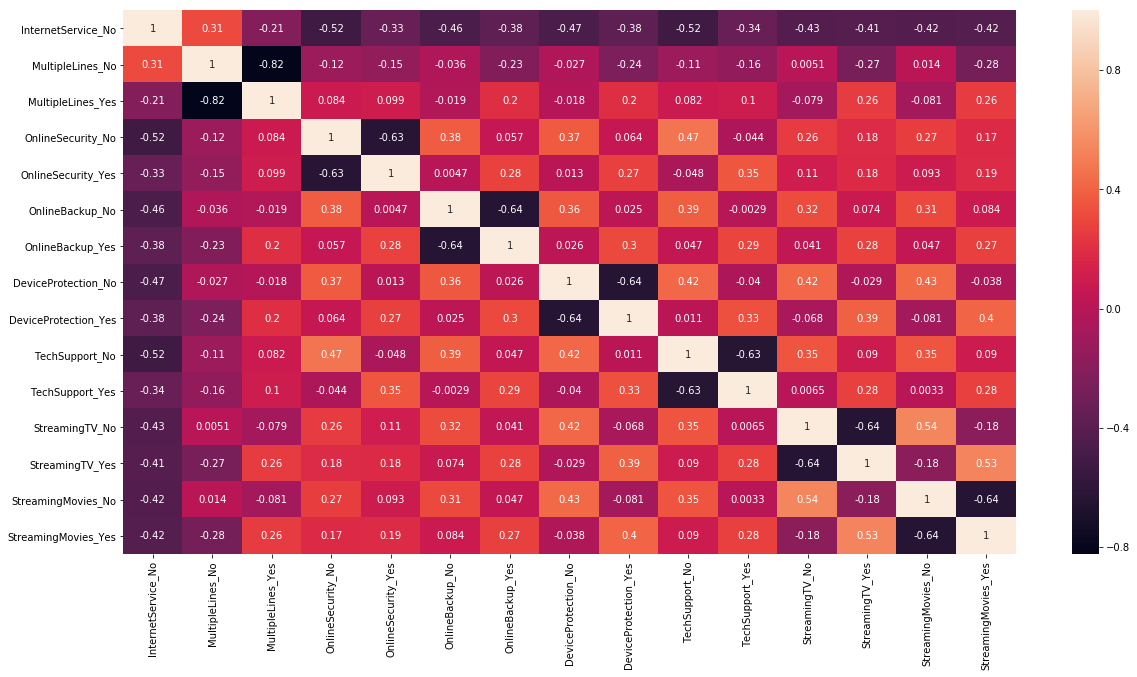

In [46]:
check = customer2.iloc[:,16:]
plt.figure(figsize=(20,10))
sb.heatmap(check.corr(),annot=True)

In [47]:
drop_columns = ['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No'
                ,'TechSupport_No','StreamingTV_No','StreamingMovies_No']

In [48]:
X_train=X_train.drop(drop_columns,axis=1)
X_test=X_test.drop(drop_columns,axis=1)

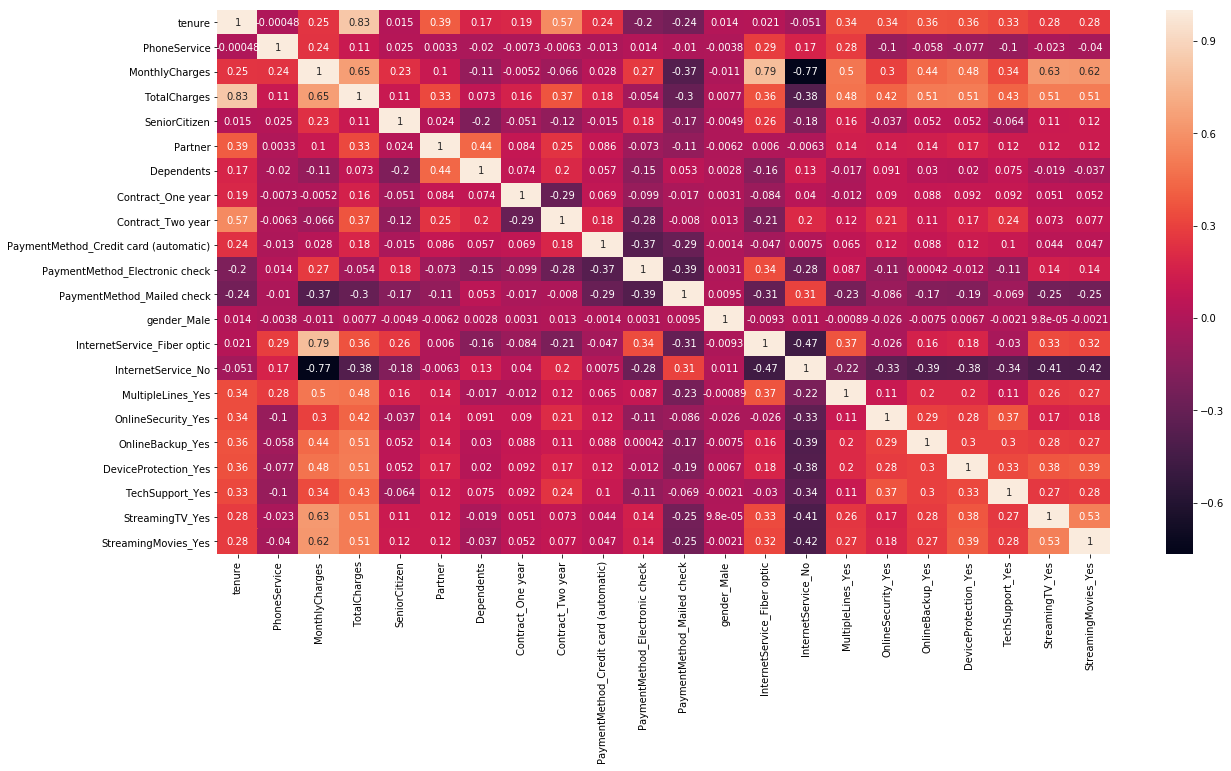

In [49]:
plt.figure(figsize=(20,10))
sb.heatmap(X_train.corr(),annot=True)

# Step 7: Model Buidling with Stats Models

In [50]:
import statsmodels.api as sm

In [51]:
logml = sm.GLM(y_train,sm.add_constant(X_train),family=sm.families.Binomial())

In [52]:
logml.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4899
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2011.3
Date:                Sat, 09 May 2020   Deviance:                       4022.5
Time:                        11:55:09   Pearson chi2:                 5.95e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.8769      1.544     -2.510      0.012      -6.904      -0.850
tenure                                   -1.4872      0.189     -7.888      0.000      -1.857      -1.118
PhoneService                              1.0139      0.788      1.287      0.198      -0.530       2.558
MonthlyCharges                           -2.2776      1.158     -1.967      0.049      -4.547      -0.008
TotalCharges                              0.7109      0.197      3.601      0.000       0.324       1.098
SeniorCitizen                             0.4178      0.101      4.128      0.000       0.219       0.616
Partner                                   0.0359      0.093      0.384      0.701      -0.147       0.219
Dependents                               -0.1473      0.107     -1.373      0.170      -0.357       0.063
Contract_One year                        -0.6851      0.128     -5.335      0.000      -0.937      -0.433
Contract_Two year                        -1.2908      0.211     -6.106      0.000      -1.705      -0.877
PaymentMethod_Credit card (automatic)    -0.2490      0.137     -1.823      0.068      -0.517       0.019
PaymentMethod_Electronic check            0.1790      0.112      1.594      0.111      -0.041       0.399
PaymentMethod_Mailed check               -0.2630      0.137     -1.918      0.055      -0.532       0.006
gender_Male                              -0.0371      0.078     -0.474      0.635      -0.190       0.116
InternetService_Fiber optic               2.6376      0.965      2.732      0.006       0.746       4.529
InternetService_No                       -2.9187      0.980     -2.979      0.003      -4.839      -0.998
MultipleLines_Yes                         0.5927      0.213      2.776      0.005       0.174       1.011
OnlineSecurity_Yes                       -0.0268      0.216     -0.124      0.901      -0.450       0.397
OnlineBackup_Yes                          0.1968      0.211      0.932      0.352      -0.217       0.611
DeviceProtection_Yes                      0.3347      0.215      1.559      0.119      -0.086       0.756
TechSupport_Yes                          -0.0074      0.216     -0.034      0.973      -0.431       0.416
StreamingTV_Yes                           1.0088      0.396      2.551      0.011       0.234       1.784
StreamingMovies_Yes                       0.8973      0.395      2.271      0.023       0.123       1.672
=========================================================================================================
"""

# Step 8: Feature Selection Using RFE (Coarse Tunning)

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [54]:
model = LogisticRegression()
model.fit(X_train,y_train)
rfe = RFE(model,15)
rfe = rfe.fit(X_train,y_train)

In [55]:
rfe.support_

array([ True, False,  True,  True,  True, False, False,  True,  True,
        True, False,  True, False,  True,  True,  True,  True, False,
       False,  True,  True,  True])

In [56]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', False, 3),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 6),
 ('Dependents', False, 5),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', True, 1),
 ('PaymentMethod_Electronic check', False, 2),
 ('PaymentMethod_Mailed check', True, 1),
 ('gender_Male', False, 7),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_Yes', True, 1),
 ('OnlineSecurity_Yes', True, 1),
 ('OnlineBackup_Yes', False, 4),
 ('DeviceProtection_Yes', False, 8),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_Yes', True, 1)]

In [57]:
cols=X_train.columns[rfe.support_]

In [58]:
cols

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'OnlineSecurity_Yes', 'TechSupport_Yes',
       'StreamingTV_Yes', 'StreamingMovies_Yes'],
      dtype='object')

In [59]:
X_train.columns[~rfe.support_]

Index(['PhoneService', 'Partner', 'Dependents',
       'PaymentMethod_Electronic check', 'gender_Male', 'OnlineBackup_Yes',
       'DeviceProtection_Yes'],
      dtype='object')

In [60]:
X_train_1=sm.add_constant(X_train[cols])
logml2 = sm.GLM(y_train,X_train_1,family=sm.families.Binomial())
res=logml2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2015.0
Date:                Sat, 09 May 2020   Deviance:                       4030.1
Time:                        11:55:12   Pearson chi2:                 6.06e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.8292      0.200     -9.141      0.000      -2.221      -1.437
tenure                                   -1.5116      0.187     -8.092      0.000      -1.878      -1.145
MonthlyCharges                           -0.8080      0.210     -3.849      0.000      -1.219      -0.397
TotalCharges                              0.7225      0.197      3.671      0.000       0.337       1.108
SeniorCitizen                             0.4466      0.099      4.496      0.000       0.252       0.641
Contract_One year                        -0.7023      0.128     -5.501      0.000      -0.953      -0.452
Contract_Two year                        -1.3102      0.210     -6.229      0.000      -1.722      -0.898
PaymentMethod_Credit card (automatic)    -0.3705      0.113     -3.293      0.001      -0.591      -0.150
PaymentMethod_Mailed check               -0.3920      0.111     -3.530      0.000      -0.610      -0.174
InternetService_Fiber optic               1.4442      0.229      6.297      0.000       0.995       1.894
InternetService_No                       -1.7058      0.216     -7.891      0.000      -2.130      -1.282
MultipleLines_Yes                         0.3521      0.105      3.357      0.001       0.147       0.558
OnlineSecurity_Yes                       -0.2830      0.108     -2.628      0.009      -0.494      -0.072
TechSupport_Yes                          -0.2530      0.109     -2.317      0.020      -0.467      -0.039
StreamingTV_Yes                           0.5346      0.117      4.587      0.000       0.306       0.763
StreamingMovies_Yes                       0.4237      0.114      3.719      0.000       0.200       0.647
=========================================================================================================
"""

In [61]:
y_train_pred=res.predict(X_train_1)
y_train_pred[:10]  #these are class prob

879     0.192576
5790    0.261415
6498    0.595242
880     0.453116
2784    0.641384
3874    0.398154
5387    0.476725
6623    0.792443
4465    0.209547
5364    0.499764
dtype: float64

In [62]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values,'Churn_prob':y_train_pred})
y_train_pred_final['CustID'] = y_train_pred.index
y_train_pred_final.head()

,Churn,Churn_prob,CustID
879,0,0.192576,879
5790,0,0.261415,5790
6498,1,0.595242,6498
880,1,0.453116,880
2784,1,0.641384,2784


### RANDOM CUT-OFF is 0.5

In [63]:
y_train_pred_final['Prediction'] = y_train_pred_final.Churn_prob.apply(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_prob,CustID,Prediction
879,0,0.192576,879,0
5790,0,0.261415,5790,0
6498,1,0.595242,6498,1
880,1,0.453116,880,0
2784,1,0.641384,2784,1


In [64]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [65]:
cm = confusion_matrix(y_train_pred_final.Churn,y_train_pred_final.Prediction)
cm

array([[3261,  374],
       [ 588,  699]], dtype=int64)

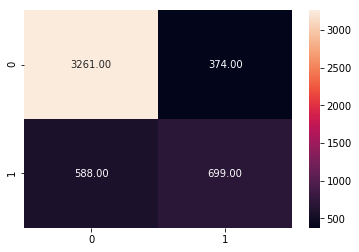

In [66]:
sb.heatmap(cm,annot=True,fmt='.2f')

In [67]:
# ACCURACY via sklearn
accuracy_score(y_train_pred_final.Churn,y_train_pred_final.Prediction) 

0.8045509955302722

In [68]:
TN =cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]

In [69]:
# ACCURACY via index
accuracy = (TN+TP)/(TN+TP+FN+FP)
accuracy

0.8045509955302722

In [70]:
# ACCURACY via numpy
cm.diagonal().sum()/cm.sum()

0.8045509955302722

In [71]:
#checking VIF's

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [72]:
vif = pd.DataFrame()
vif['Features'] = X_train_1[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train_1[cols].values,i) for i in range(X_train_1[cols].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,MonthlyCharges,13.79
2,TotalCharges,10.50
0,tenure,7.40
9,InternetService_No,5.19
8,InternetService_Fiber optic,4.60
5,Contract_Two year,3.27
14,StreamingMovies_Yes,2.68
13,StreamingTV_Yes,2.67
10,MultipleLines_Yes,2.30
12,TechSupport_Yes,2.00


In [73]:
cols = cols.drop('MonthlyCharges',1)
cols

Index(['tenure', 'TotalCharges', 'SeniorCitizen', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Mailed check', 'InternetService_Fiber optic',
       'InternetService_No', 'MultipleLines_Yes', 'OnlineSecurity_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes'],
      dtype='object')

In [74]:
# Re-Run the model
X_train_2=sm.add_constant(X_train_1[cols])
logml3 = sm.GLM(y_train,X_train_2,family=sm.families.Binomial())
res=logml3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4907
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2022.4
Date:                Sat, 09 May 2020   Deviance:                       4044.9
Time:                        11:55:14   Pearson chi2:                 5.73e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.2331      0.124     -9.980      0.000      -1.475      -0.991
tenure                                   -1.3348      0.180     -7.412      0.000      -1.688      -0.982
TotalCharges                              0.5001      0.187      2.668      0.008       0.133       0.868
SeniorCitizen                             0.4649      0.099      4.690      0.000       0.271       0.659
Contract_One year                        -0.7309      0.127     -5.742      0.000      -0.980      -0.481
Contract_Two year                        -1.3221      0.210     -6.300      0.000      -1.733      -0.911
PaymentMethod_Credit card (automatic)    -0.3787      0.112     -3.367      0.001      -0.599      -0.158
PaymentMethod_Mailed check               -0.3831      0.110     -3.467      0.001      -0.600      -0.167
InternetService_Fiber optic               0.6754      0.110      6.157      0.000       0.460       0.890
InternetService_No                       -1.1324      0.158     -7.181      0.000      -1.442      -0.823
MultipleLines_Yes                         0.1765      0.094      1.884      0.060      -0.007       0.360
OnlineSecurity_Yes                       -0.4185      0.102     -4.107      0.000      -0.618      -0.219
TechSupport_Yes                          -0.4094      0.101     -4.035      0.000      -0.608      -0.211
StreamingTV_Yes                           0.2835      0.096      2.940      0.003       0.095       0.472
StreamingMovies_Yes                       0.1889      0.096      1.968      0.049       0.001       0.377
=========================================================================================================
"""

In [75]:
y_train_pred=res.predict(X_train_2).values.reshape(-1)

In [76]:
y_train_pred[:10]

array([0.22773691, 0.22711933, 0.66196081, 0.5095418 , 0.65495329,
       0.40904749, 0.36164006, 0.78786662, 0.1710219 , 0.51667274])

In [77]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values,'Churn_prob':y_train_pred})
y_train_pred_final.head()

,Churn,Churn_prob
0,0,0.227737
1,0,0.227119
2,1,0.661961
3,1,0.509542
4,1,0.654953


In [78]:
y_train_pred_final['Prediction'] = y_train_pred_final.Churn_prob.apply(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_prob,Prediction
0,0,0.227737,0
1,0,0.227119,0
2,1,0.661961,1
3,1,0.509542,1
4,1,0.654953,1


In [79]:
accuracy_score(y_train_pred_final.Churn,y_train_pred_final.Prediction)

0.8049573344169036

In [80]:
vif = pd.DataFrame()
vif['Features'] = X_train_2[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train_2[cols].values,i) for i in range(X_train_2[cols].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,TotalCharges,7.21
0,tenure,6.88
4,Contract_Two year,3.21
7,InternetService_Fiber optic,2.62
13,StreamingMovies_Yes,2.56
8,InternetService_No,2.53
12,StreamingTV_Yes,2.53
9,MultipleLines_Yes,2.23
11,TechSupport_Yes,2.00
3,Contract_One year,1.86


In [81]:
cols = cols.drop('TotalCharges',1)
cols

Index(['tenure', 'SeniorCitizen', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'OnlineSecurity_Yes', 'TechSupport_Yes',
       'StreamingTV_Yes', 'StreamingMovies_Yes'],
      dtype='object')

In [82]:
# Re-Run the model
X_train_3=sm.add_constant(X_train_2[cols])
logml4 = sm.GLM(y_train,X_train_3,family=sm.families.Binomial())
res=logml4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2026.1
Date:                Sat, 09 May 2020   Deviance:                       4052.3
Time:                        11:55:15   Pearson chi2:                 5.17e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.3187      0.118    -11.129      0.000      -1.551      -1.086
tenure                                   -0.8948      0.066    -13.618      0.000      -1.024      -0.766
SeniorCitizen                             0.4688      0.099      4.712      0.000       0.274       0.664
Contract_One year                        -0.7248      0.127     -5.725      0.000      -0.973      -0.477
Contract_Two year                        -1.2984      0.208     -6.240      0.000      -1.706      -0.891
PaymentMethod_Credit card (automatic)    -0.3802      0.113     -3.377      0.001      -0.601      -0.160
PaymentMethod_Mailed check               -0.3472      0.109     -3.173      0.002      -0.562      -0.133
InternetService_Fiber optic               0.8102      0.097      8.325      0.000       0.619       1.001
InternetService_No                       -1.1447      0.157     -7.287      0.000      -1.453      -0.837
MultipleLines_Yes                         0.2215      0.092      2.408      0.016       0.041       0.402
OnlineSecurity_Yes                       -0.3859      0.101     -3.810      0.000      -0.584      -0.187
TechSupport_Yes                          -0.3743      0.101     -3.714      0.000      -0.572      -0.177
StreamingTV_Yes                           0.3431      0.094      3.660      0.000       0.159       0.527
StreamingMovies_Yes                       0.2456      0.094      2.625      0.009       0.062       0.429
=========================================================================================================
"""

In [83]:
y_train_pred=res.predict(X_train_3).values.reshape(-1)

In [84]:
y_train_pred[:10]

array([0.24697231, 0.26831412, 0.65532619, 0.53552502, 0.67860457,
       0.38702087, 0.34262992, 0.79129709, 0.19792565, 0.52712376])

In [85]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values,'Churn_prob':y_train_pred})
y_train_pred_final.head()

,Churn,Churn_prob
0,0,0.246972
1,0,0.268314
2,1,0.655326
3,1,0.535525
4,1,0.678605


In [86]:
y_train_pred_final['Prediction'] = y_train_pred_final.Churn_prob.apply(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_prob,Prediction
0,0,0.246972,0
1,0,0.268314,0
2,1,0.655326,1
3,1,0.535525,1
4,1,0.678605,1


In [87]:
accuracy_score(y_train_pred_final.Churn,y_train_pred_final.Prediction)

0.8055668427468509

In [88]:
vif = pd.DataFrame()
vif['Features'] = X_train_3[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train_3[cols].values,i) for i in range(X_train_3[cols].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,Contract_Two year,3.10
12,StreamingMovies_Yes,2.51
11,StreamingTV_Yes,2.48
6,InternetService_Fiber optic,2.43
8,MultipleLines_Yes,2.21
7,InternetService_No,2.13
0,tenure,1.98
10,TechSupport_Yes,1.98
2,Contract_One year,1.83
9,OnlineSecurity_Yes,1.77


In [89]:
X_train_3[cols].columns

Index(['tenure', 'SeniorCitizen', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'OnlineSecurity_Yes', 'TechSupport_Yes',
       'StreamingTV_Yes', 'StreamingMovies_Yes'],
      dtype='object')

In [90]:
cm = confusion_matrix(y_train_pred_final.Churn,y_train_pred_final.Prediction)
cm

array([[3269,  366],
       [ 591,  696]], dtype=int64)

In [91]:
# TRUE POSITIVE RATE
TN =cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]

In [92]:
#SENSITIVITY OR TRUE POSITIVE RATE OR RECALL
TPR=TP/(TP+FN)
TPR

0.5407925407925408

In [93]:
# SPECIFICITY OR TRUE NEGATIVE RATE
TNR = TN/(TN+FP)
TNR

0.8993122420907841

In [94]:
from sklearn import metrics

# Step 9: Ploting the ROC-AOC Curve

In [95]:
def draw_roc(actual,probs):
    fpr,tpr,threshold=metrics.roc_curve(actual,probs)
    auc_score=metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr,label='ROC CURVE (area = %0.2f)'%auc_score)
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-AOC Curve')
    plt.legend(loc='lower right')
    plt.show()

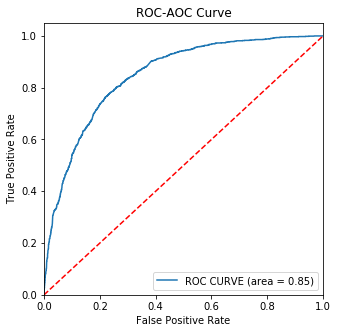

In [96]:
draw_roc(y_train_pred_final.Churn,y_train_pred_final.Churn_prob)

# Step 10: Finding the Optimal Cut-Off

In [97]:
numbers = [x/10 for x in range(10)]
numbers

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [98]:
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Churn_prob.apply(lambda x: 1 if x>i else 0)
y_train_pred_final.head()    

,Churn,Churn_prob,Prediction,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.246972,0,1,1,1,0,0,0,0,0,0,0
1,0,0.268314,0,1,1,1,0,0,0,0,0,0,0
2,1,0.655326,1,1,1,1,1,1,1,1,0,0,0
3,1,0.535525,1,1,1,1,1,1,1,0,0,0,0
4,1,0.678605,1,1,1,1,1,1,1,1,0,0,0


In [99]:
#now lets calculate Accuracy - Sensitivity and Specificity Trade - Off

cut_off_df = pd.DataFrame(columns=['Prob','Accuracy','Sensitivity','Specificity'])
for i in numbers:
    cm1 = confusion_matrix(y_train_pred_final.Churn,y_train_pred_final[i])
    accuracy =cm1.diagonal().sum()/cm1.sum()
    sensitivity = cm1[1,1]/(cm1[1,1]+cm1[1,0])
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    cut_off_df.loc[i] = [i,accuracy,sensitivity,specificity]

cut_off_df    

,Prob,Accuracy,Sensitivity,Specificity
0.0,0.0,0.261479,1.000000,0.000000
0.1,0.1,0.615807,0.943279,0.499862
0.2,0.2,0.720236,0.851593,0.673728
0.3,0.3,0.768793,0.777778,0.765612
0.4,0.4,0.795205,0.651904,0.845942
0.5,0.5,0.805567,0.540793,0.899312
0.6,0.6,0.795815,0.376068,0.944429
0.7,0.7,0.779155,0.208236,0.981293
0.8,0.8,0.747257,0.038850,0.998074
0.9,0.9,0.738521,0.000000,1.000000


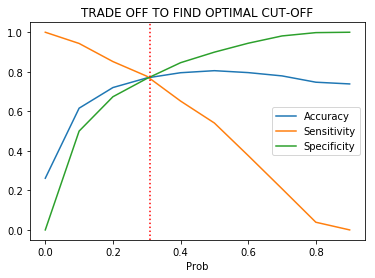

In [100]:
cut_off_df.plot.line(x='Prob',y=['Accuracy','Sensitivity','Specificity'])
plt.title('TRADE OFF TO FIND OPTIMAL CUT-OFF')
plt.axvline(x=0.31,color='red',linestyle='dotted')
plt.show()

# from tha above graph we conclude that the optimal cut-off is 0.3%

In [101]:
y_train_pred_final['final_prediction'] =  y_train_pred_final.Churn_prob.apply(lambda x:1 if x>0.3 else 0)
y_train_pred_final.head()

,Churn,Churn_prob,Prediction,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_prediction
0,0,0.246972,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.268314,0,1,1,1,0,0,0,0,0,0,0,0
2,1,0.655326,1,1,1,1,1,1,1,1,0,0,0,1
3,1,0.535525,1,1,1,1,1,1,1,0,0,0,0,1
4,1,0.678605,1,1,1,1,1,1,1,1,0,0,0,1


In [102]:
from sklearn.metrics import classification_report

In [103]:
print(classification_report(y_train_pred_final.Churn,y_train_pred_final.final_prediction))

              precision    recall  f1-score   support

           0       0.91      0.77      0.83      3635
           1       0.54      0.78      0.64      1287

    accuracy                           0.77      4922
   macro avg       0.72      0.77      0.73      4922
weighted avg       0.81      0.77      0.78      4922



# Step 11: TEST THE MODEL

In [104]:
X_test[['tenure','MonthlyCharges','TotalCharges']] = scalar.transform(X_test[['tenure','MonthlyCharges','TotalCharges']])

In [105]:
X_test = X_test[cols]

In [106]:
X_test.head()

,tenure,SeniorCitizen,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,OnlineSecurity_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
942,-0.347623,0,0,0,1,0,1,0,0,0,0,0,1
3730,0.999203,0,0,0,1,0,1,0,1,0,0,1,1
1761,1.040015,0,0,1,1,0,0,1,1,0,0,0,0
2283,-1.286319,0,0,0,0,1,1,0,0,0,0,0,0
1872,0.346196,0,0,1,0,0,0,1,0,0,0,0,0


In [107]:
X_test_sm  = sm.add_constant(X_test)
y_test_pred=res.predict(X_test_sm)

In [108]:
y_test_pred[:10]

942     0.417762
3730    0.274383
1761    0.007759
2283    0.573294
1872    0.016764
1970    0.682770
2532    0.297378
1616    0.007714
2485    0.596105
5914    0.141317
dtype: float64

In [109]:
y_test_pred_final = pd.DataFrame({'Churn':y_test.values,'Churn_prob':y_test_pred})
y_test_pred_final.head()

,Churn,Churn_prob
942,0,0.417762
3730,1,0.274383
1761,0,0.007759
2283,1,0.573294
1872,0,0.016764


In [110]:
y_test_pred_final['prediction'] = y_test_pred_final.Churn_prob.apply(lambda x:1 if x>0.3 else 0)
y_test_pred_final.head()

,Churn,Churn_prob,prediction
942,0,0.417762,1
3730,1,0.274383,0
1761,0,0.007759,0
2283,1,0.573294,1
1872,0,0.016764,0


In [111]:
confusion_matrix(y_test_pred_final.Churn,y_test_pred_final.prediction)

array([[1153,  375],
       [ 157,  425]], dtype=int64)

In [112]:
accuracy_score(y_test_pred_final.Churn,y_test_pred_final.prediction)

0.747867298578199

In [113]:
print(classification_report(y_test_pred_final.Churn,y_test_pred_final.prediction))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1528
           1       0.53      0.73      0.62       582

    accuracy                           0.75      2110
   macro avg       0.71      0.74      0.71      2110
weighted avg       0.78      0.75      0.76      2110

